# Analyzing Promoted Teams in UEFA Leagues

Each August, I usually participate in several contests, trying to pick the top "N" finishers in European leagues. This year, I thought I would be cleaver and create my own contest to predict the first place _and_ last place teams in the top 5 European leagues. At first, it seemed like the last place teams would be a good tie-breaker (since everyone picks Juventus, PSG and Bayern to finish first, and most people pick Barcelona and Man. City/Liverpool as well). Once I started getting submissions though, I realized the obvious trend. Most people picked the lowest promoted team to finish last.

This got me thinking about what the actual trends are for promoted teams, so here is my analysis.

In [ ]:
# Install any necessary packages
library(devtools)
# https://cran.r-project.org/web/packages/engsoccerdata/README.html
install_github('jalapic/engsoccerdata', username = "jalapic")
# https://cran.r-project.org/web/packages/ggplot2/readme/README.html
install.packages("ggplot2")

For this project, I looked at the top 5 European leagues:
*  EPL
*  La Liga
*  Seria A
*  Bundesliga
*  Ligue 1

The `engsoccerdata` R package has final table data for each of these leagues up to the 2016-17 season.

In [2]:
suppressWarnings(library(engsoccerdata))
suppressWarnings(library(ggplot2))
suppressWarnings(library(hash))
suppressWarnings(library(scales))

hash-2.2.6 provided by Decision Patterns



Here is a common function that returns the final table position of each promoted team in each season, as well as calculates the average position of all promoted teams in a season.

In [3]:
# GetPromotedTeamPositions function
#
# Creates a dataframe of the final table positions of each team
# the year following their promotion into the top flight.
#
# Returns a data.frame with the following columns:
#   year: The year (season) of the team position.
#   team: The name of the promoted team.
#   position: The final table position corresponding with each team name.
#   avgpos: The average table position of all promoted teams in a season.
GetPromotedTeamPositions <- function(arg.league, arg.year.range) {
  # Columns for the dataframe
  column.years <- c()
  column.teams <- c()
  column.standings <- c()
  column.avgs <- c()

  curr.index <- 1

  for (year in arg.year.range) {
    # Use the maketable() function from engsoccerdata to get final tables for a season
    curr.table <- maketable(arg.league, Season=year, tier=1)
    prev.table <- maketable(arg.league, Season=year-1, tier=1)
    curr.teams <- curr.table[, "team"]
    prev.teams <- prev.table[, "team"]
    # Teams in the current table who were not in the previous table are the promoted teams
    promoted.teams <- setdiff(curr.teams, prev.teams)
    promoted.team.positions <- curr.table[curr.table$team %in% promoted.teams, c("team", "Pos")]
    # Populate columns
    for (i in 1:length(promoted.teams)) {
      column.years[curr.index] <- year
      column.avgs[curr.index] <- mean(as.numeric(promoted.team.positions$Pos))
      column.teams[curr.index] <- promoted.team.positions$team[i]
      column.standings[curr.index] <- as.numeric(promoted.team.positions$Pos[i])
      curr.index <- curr.index + 1
    }
  }
  df <- data.frame(year=column.years,
                   team=column.teams,
                   position=column.standings,
                   avgpos=column.avgs)
  return(df)
}

In [4]:
# Define common plot layers
plot.layers <- list(
    geom_point(aes(x=year, y=position)),
    # Team name point labels
    geom_text(aes(x=year, y=position, label=team), size=2, hjust=-0.1, angle=60),
    # Average position line
    geom_line(aes(x=year, y=avgpos), color="blue"),
    scale_x_continuous(breaks=pretty_breaks(n=22), limits=c(NA, 2019)),
    scale_y_continuous(trans="reverse", breaks=pretty_breaks(n=22), limits=c(NA, 1)),
    theme(
        axis.text.x=element_text(angle=90),
        panel.grid.minor=element_blank(),
        plot.title=element_text(hjust=0.5),
    )
)

For each league, I decided to look at data over the last 20 years. This presents some challenges as both Seria A and Ligue 1 changed from an 18 team table to a 20 team table over this period (however it is past the seasons where the EPL and La Liga went from 22 teams down to 20).

For each of the leagues below, I manually added results from the 2017-18 and 2018-19 seasons to bring them up-to-date. In the corresponding charts, I've marked the relegation zone with a dashed red line, and charted the average position with a blue line.

The Premier League seemed to have better success in the late-90's keeping promoted teams in the top flight, but since then has fallen into a pattern with promoted teams averaging towards the bottom of the table.

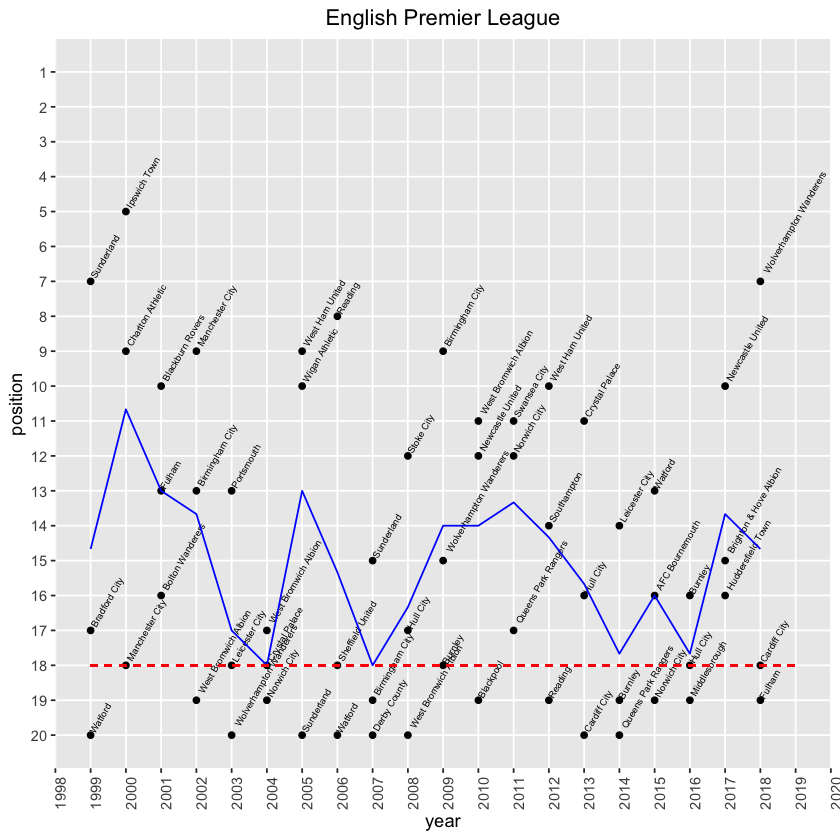

In [5]:
epl.df <- GetPromotedTeamPositions(england, 1999:2016)
# Manually add 2017 and 2018 seasons
epl.df <- rbind(epl.df, 
                data.frame(
                    year=rep(2017, 3),
                    team=c("Newcastle United", "Brighton & Hove Albion", "Huddersfield Town"),
                    position=c(10, 15, 16),
                    avgpos=rep(mean(c(10, 15, 16)), 3)
                ))
epl.df <- rbind(epl.df, 
                data.frame(
                    year=rep(2018, 3),
                    team=c("Wolverhampton Wanderers", "Cardiff City", "Fulham"),
                    position=c(7, 18, 19),
                    avgpos=rep(mean(c(7, 18, 19)), 3)
                ))

ggplot(data=epl.df) + 
    plot.layers +
    # Add relegation line
    geom_segment(aes(x=1999, y=18, xend=2019, yend=18), linetype="dashed", color="red") +
    ggtitle("English Premier League")


La Liga as well has seen a pattern of promoted teams hovering towards the bottom of the table, but has been trending up as of late.

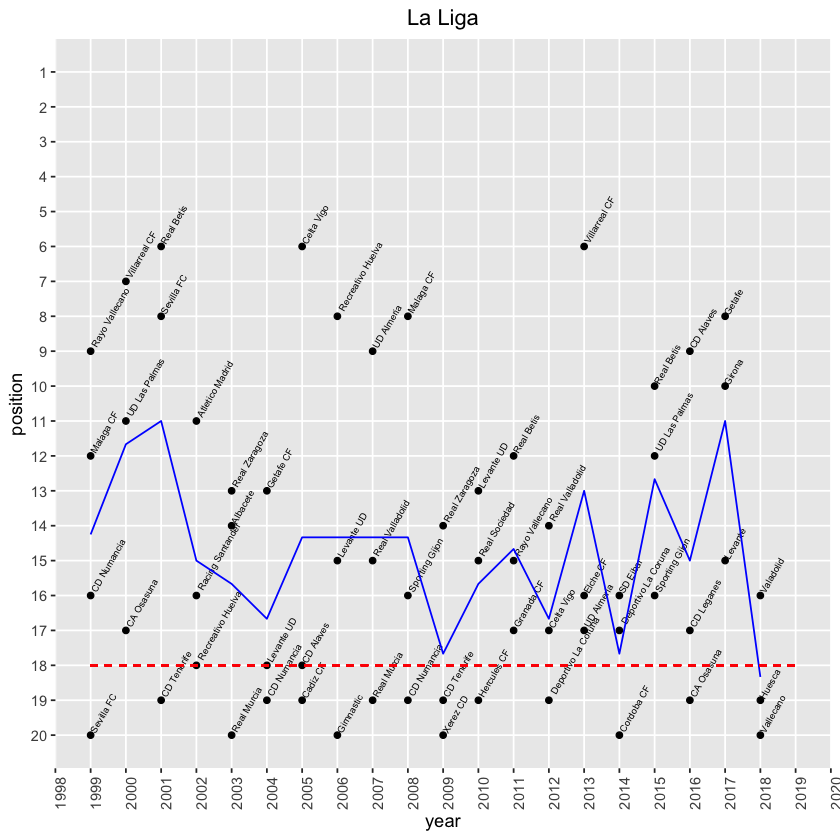

In [6]:
la.liga.df <- GetPromotedTeamPositions(spain, 1999:2016)
# Manually add 2017 and 2018 seasons
la.liga.df <- rbind(la.liga.df, 
                    data.frame(
                        year=rep(2017, 3),
                        team=c("Getafe", "Girona", "Levante"),
                        position=c(8, 10, 15),
                        avgpos=rep(mean(c(8, 10, 15)), 3)
                    ))
la.liga.df <- rbind(la.liga.df, 
                    data.frame(
                        year=rep(2018, 3),
                        team=c("Valadolid", "Huesca", "Vallecano"),
                        position=c(16, 19, 20),
                        avgpos=rep(mean(c(16, 19, 20)), 3)
                    ))

ggplot(data=la.liga.df) + 
    plot.layers +
    # Add relegation line
    geom_segment(aes(x=1999, y=18, xend=2019, yend=18), linetype="dashed", color="red") +
    ggtitle("La Liga")


In 2004, Serie A changed from a league that relegated 4 teams out of 18, to a more standard league that now replaces 3 teams out of 20. Other than Juventus' post-scandal return to the top-flight in 2007, teams tend to hover around the relegation zone.

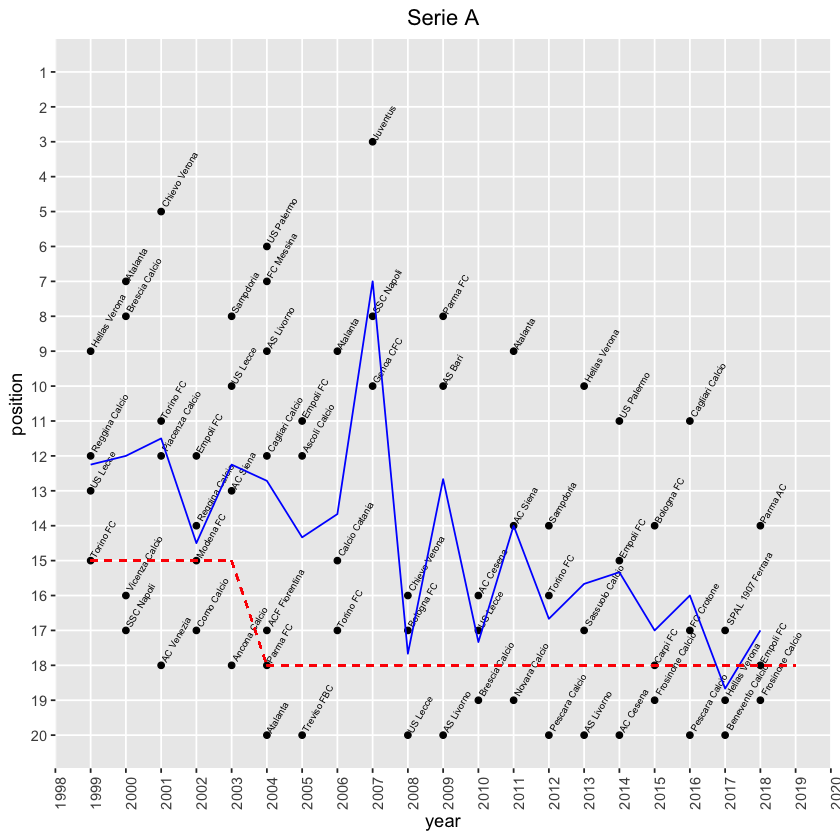

In [7]:
serie.a.df <- GetPromotedTeamPositions(italy, 1999:2016)
# Manually add 2017 and 2018 seasons
serie.a.df <- rbind(serie.a.df,
                    data.frame(
                        year=rep(2017, 3),
                        team=c("SPAL 1907 Ferrara", "Hellas Verona", "Benevento Calcio"),
                        position=c(17, 19, 20),
                        avgpos=rep(mean(c(17, 19, 20)), 3)
                    ))
serie.a.df <- rbind(serie.a.df,
                    data.frame(
                        year=rep(2018, 3),
                        team=c("Parma AC", "Empoli FC", "Frosinone Calcio"),
                        position=c(14, 18, 19),
                        avgpos=rep(mean(c(14, 18, 19)), 3)
                    ))

ggplot(data=serie.a.df) +
    plot.layers +
    # Add relegation lines
    geom_segment(aes(x=1999, y=15, xend=2003, yend=15), linetype="dashed", color="red") +
    geom_segment(aes(x=2003, y=15, xend=2004, yend=18), linetype="dashed", color="red") +
    geom_segment(aes(x=2004, y=18, xend=2019, yend=18), linetype="dashed", color="red") +
    ggtitle("Serie A")


In recent years, teams promoted to 1. Bundesliga have been strong, raising the average position.

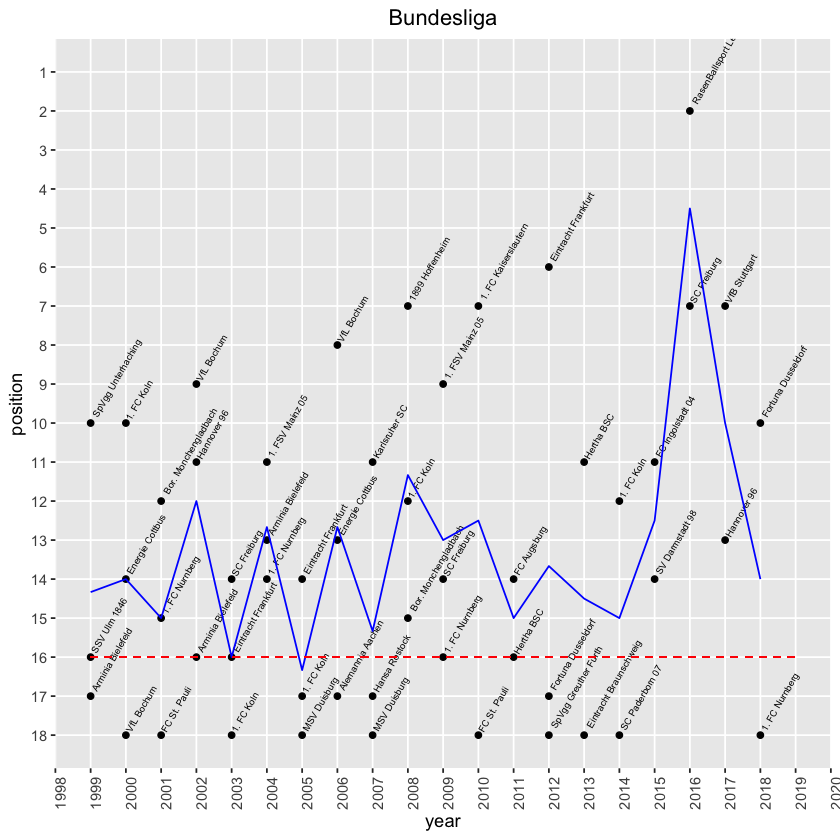

In [8]:
bundesliga.df <- GetPromotedTeamPositions(germany, 1999:2016)
# Manually add 2017 and 2018 seasons
bundesliga.df <- rbind(bundesliga.df,
                       data.frame(
                           year=rep(2017, 2),
                           team=c("VfB Stuttgart", "Hannover 96"),
                           position=c(7, 13),
                           avgpos=rep(mean(c(7, 13)), 2)
                       ))
bundesliga.df <- rbind(bundesliga.df,
                       data.frame(
                           year=rep(2018, 2),
                           team=c("Fortuna Dusseldorf", "1. FC Nurnberg"),
                           position=c(10, 18),
                           avgpos=rep(mean(c(10, 18)), 2)
                       ))

ggplot(data=bundesliga.df) +
    plot.layers +
    # Add relegation lines
    geom_segment(aes(x=1999, y=16, xend=2019, yend=16), linetype="dashed", color="red") +
    ggtitle("Bundesliga")

Ligue 1 changed from an 18 team league to a 20 team league in 2002. The change affected the average position of promoted teams at first, but has been trending upward since.

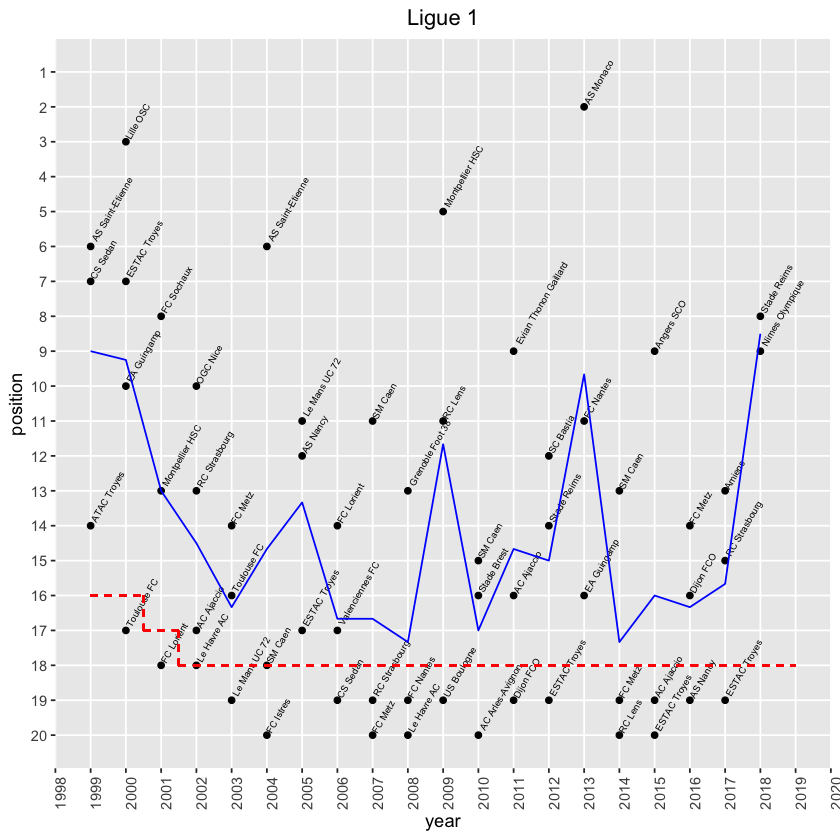

In [9]:
ligue.1.df <- GetPromotedTeamPositions(france, 1999:2016)
# Manually add 2017 and 2018 seasons
ligue.1.df <- rbind(ligue.1.df,
                    data.frame(
                        year=rep(2017, 3),
                        team=c("Amiens", "RC Strasbourg", "ESTAC Troyes"),
                        position=c(13, 15, 19),
                        avgpos=rep(mean(c(13, 15, 19)), 3)
                    ))
ligue.1.df <- rbind(ligue.1.df,
                    data.frame(
                        year=rep(2018, 2),
                        team=c("Stade Reims", "Nimes Olympique"),
                        position=c(8, 9),
                        avgpos=rep(mean(c(8, 9)), 2)
                    ))

ggplot(data=ligue.1.df) +
    plot.layers +
    # Add relegation lines
    geom_segment(aes(x=1999, y=16, xend=2000.5, yend=16), linetype="dashed", color="red") +
    geom_segment(aes(x=2000.5, y=16, xend=2000.5, yend=17), linetype="dashed", color="red") +
    geom_segment(aes(x=2000.5, y=17, xend=2001.5, yend=17), linetype="dashed", color="red") +
    geom_segment(aes(x=2001.5, y=17, xend=2001.5, yend=18), linetype="dashed", color="red") +
    geom_segment(aes(x=2001.5, y=18, xend=2019, yend=18), linetype="dashed", color="red") +
    ggtitle("Ligue 1")

With my league data, I now wanted to see what the average promoted position was for each league. Initial analysis shows that teams promoted in the EPL have the lowest average position compared to the other leagues. Bundesliga has the highest average position, but this is helped by the fact that they have an 18-team league.

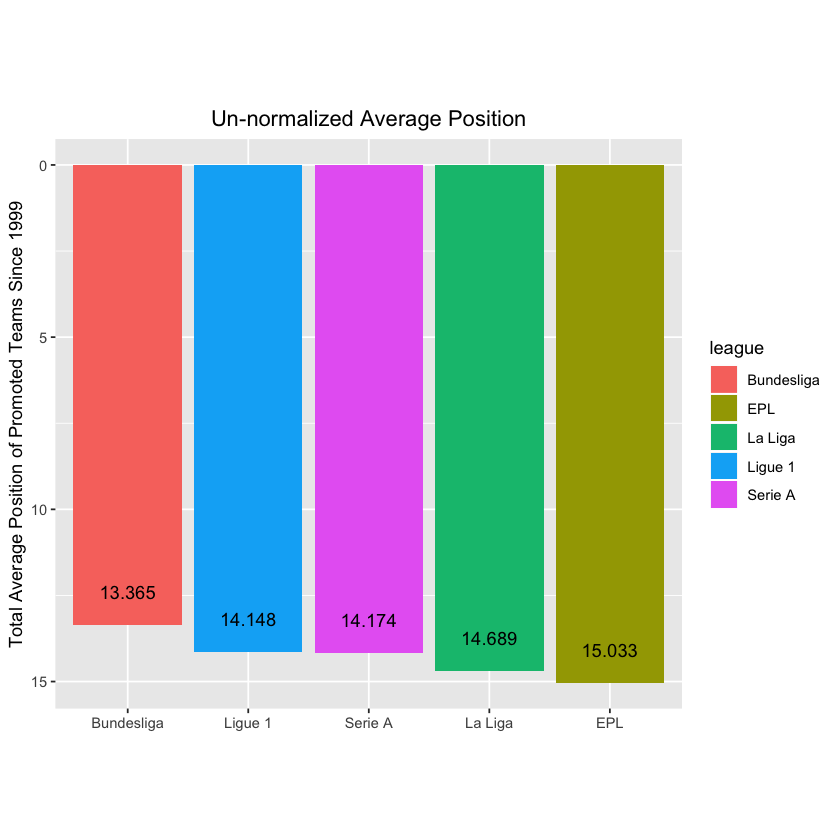

In [10]:
epl.total.avgpos  <- mean(epl.df$avgpos)
epl.total.avgpos <- round(epl.total.avgpos, 3)

la.liga.total.avgpos <- mean(la.liga.df$avgpos)
la.liga.total.avgpos <- round(la.liga.total.avgpos, 3)

serie.a.total.avgpos <- mean(serie.a.df$avgpos)
serie.a.total.avgpos <- round(serie.a.total.avgpos, 3)

bundesliga.total.avgpos  <- mean(bundesliga.df$avgpos)
bundesliga.total.avgpos <- round(bundesliga.total.avgpos, 3)

ligue.1.total.avgpos <- mean(ligue.1.df$avgpos)
ligue.1.total.avgpos <- round(ligue.1.total.avgpos, 3)

league.avg.df <- data.frame(
    league=c("EPL", "La Liga", "Serie A", "Bundesliga", "Ligue 1"),
    avgpos=c(
        epl.total.avgpos,
        la.liga.total.avgpos,
        serie.a.total.avgpos,
        bundesliga.total.avgpos,
        ligue.1.total.avgpos
    )
)

ggplot(league.avg.df, aes(x=reorder(league, avgpos), y=avgpos, fill=league)) +
    geom_bar(stat="identity") +
    geom_text(aes(label=avgpos), vjust=-2) +
    scale_y_continuous(trans="reverse") +
    coord_fixed(ratio=2/7) +
    theme(axis.title.x=element_blank(), plot.title=element_text(hjust=0.5)) +
    ylab("Total Average Position of Promoted Teams Since 1999") +
    ggtitle("Un-normalized Average Position")

In order to normalize the average position data, I scaled the average position data by 20/18ths for all of the Bundesliga seasons, and also for the fraction of Serie A and Ligue 1 seasons that were 18 teams. Scaling the data brings Bundesliga more in line with the other leagues, but with the EPL still having the lowest overall promoted team position average. Teams promoted in Ligue 1 perform the best.

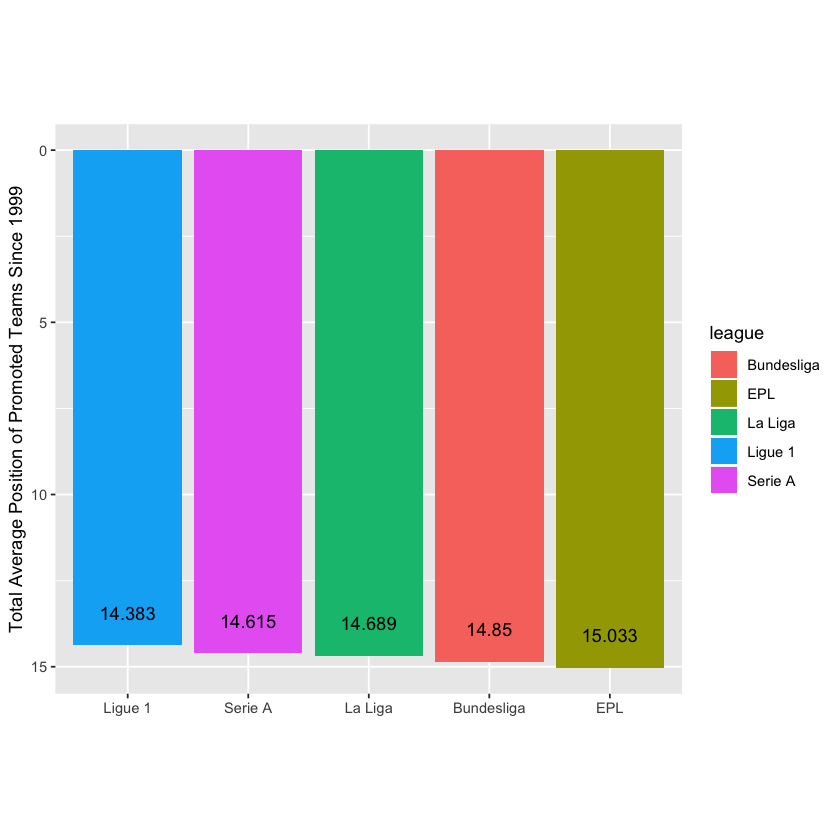

In [11]:
epl.total.avgpos  <- mean(epl.df$avgpos)
epl.total.avgpos <- round(epl.total.avgpos, 3)

la.liga.total.avgpos <- mean(la.liga.df$avgpos)
la.liga.total.avgpos <- round(la.liga.total.avgpos, 3)

serie.a.total.avgpos <- (
    mean(serie.a.df[serie.a.df$year %in% 1999:2003, "avgpos"]) * (20/18) * (5/20) +
    mean(serie.a.df[serie.a.df$year %in% 2004:2018, "avgpos"]) * (15/20))
serie.a.total.avgpos <- round(serie.a.total.avgpos, 3)

bundesliga.total.avgpos  <- mean(bundesliga.df$avgpos) * (20/18)
bundesliga.total.avgpos <- round(bundesliga.total.avgpos, 3)

ligue.1.total.avgpos <- (
    mean(ligue.1.df[ligue.1.df$year %in% 1999:2001, "avgpos"]) * (20/18) * (3/20) +
    mean(ligue.1.df[ligue.1.df$year %in% 2002:2018, "avgpos"]) * (17/20))
ligue.1.total.avgpos <- round(ligue.1.total.avgpos, 3)

league.avg.df <- data.frame(
    league=c("EPL", "La Liga", "Serie A", "Bundesliga", "Ligue 1"),
    avgpos=c(
        epl.total.avgpos,
        la.liga.total.avgpos,
        serie.a.total.avgpos,
        bundesliga.total.avgpos,
        ligue.1.total.avgpos
    )
)

ggplot(league.avg.df, aes(x=reorder(league, avgpos), y=avgpos, fill=league)) +
    geom_bar(stat="identity") +
    geom_text(aes(label=avgpos), vjust=-2) +
    scale_y_continuous(trans="reverse") +
    coord_fixed(ratio=2/7) +
    theme(axis.title.x=element_blank()) +
    ylab("Total Average Position of Promoted Teams Since 1999")

Looking at the number of teams in each league who get relegated the season after being promoted, teams in the EPL also have the hardest go of it. The EPL is tied with Serie A for relegating the most number of teams that have been promoted the season before.

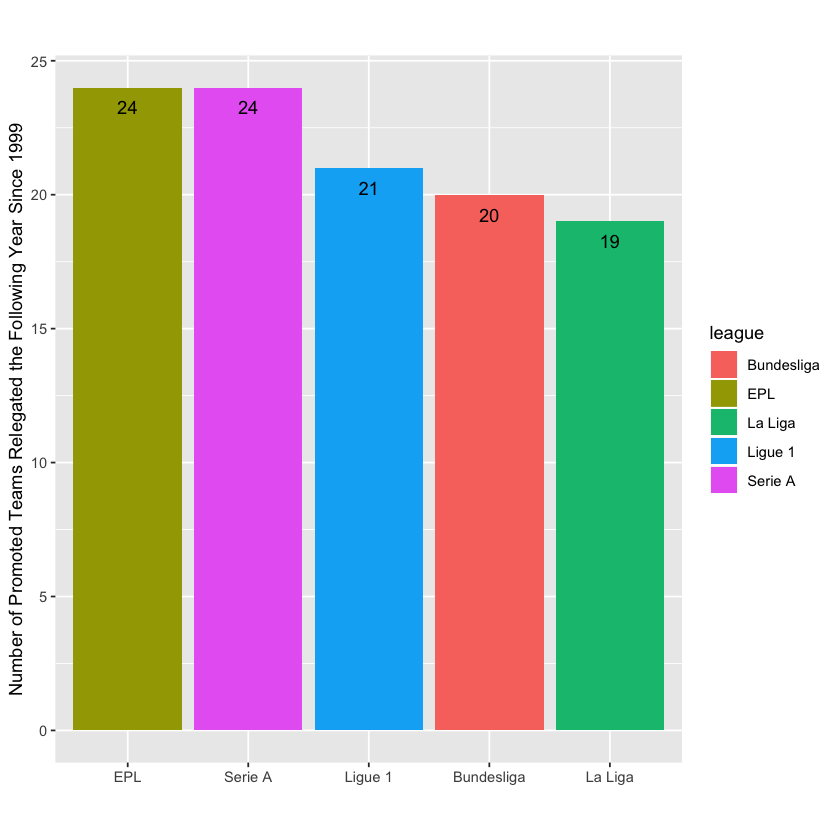

In [12]:
epl.relegation.count <- nrow(subset(epl.df, position >= 18, select=c("team")))
la.liga.relegation.count <- nrow(subset(la.liga.df, position >= 18, select=c("team")))
serie.a.relegation.count <- (nrow(subset(serie.a.df, position >= 15 & year <= 2003, select=c("team"))) +
                             nrow(subset(serie.a.df, position >= 18 & year >= 2004, select=c("team"))))
bundesliga.relegation.count <- nrow(subset(bundesliga.df, position >= 16, select=c("team")))
ligue.1.relegation.count <- (nrow(subset(ligue.1.df, position >= 16 & year <= 2001, select=c("team"))) +
                             nrow(subset(ligue.1.df, position >= 18 & year >= 2002, select=c("team"))))

league.relegation.count.df <- data.frame(league=c("EPL", "La Liga", "Serie A", "Bundesliga", "Ligue 1"),
                                         relcount=c(
                                             epl.relegation.count,
                                             la.liga.relegation.count,
                                             serie.a.relegation.count,
                                             bundesliga.relegation.count,
                                             ligue.1.relegation.count
                                         ))

ggplot(league.relegation.count.df, aes(x=reorder(league, -relcount), y=relcount, fill=league)) +
    geom_bar(stat="identity") +
    geom_text(aes(label=relcount), vjust=2) +
    coord_fixed(ratio=2/9) +
    theme(axis.title.x=element_blank()) +
    ylab("Number of Promoted Teams Relegated the Following Year Since 1999")

Conclusion, promoted teams in the EPL have the hardest chance of staying in the top-flight, with the EPL having the lowest table position average of promoted teams and also the most promoted teams being relegated the following season. Teams promoted in Ligue 1 tend to have the highest final table position on average, while La Liga tends to relegate the fewest amount of promoted teams the following season.